In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
mp_mean = df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
df['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


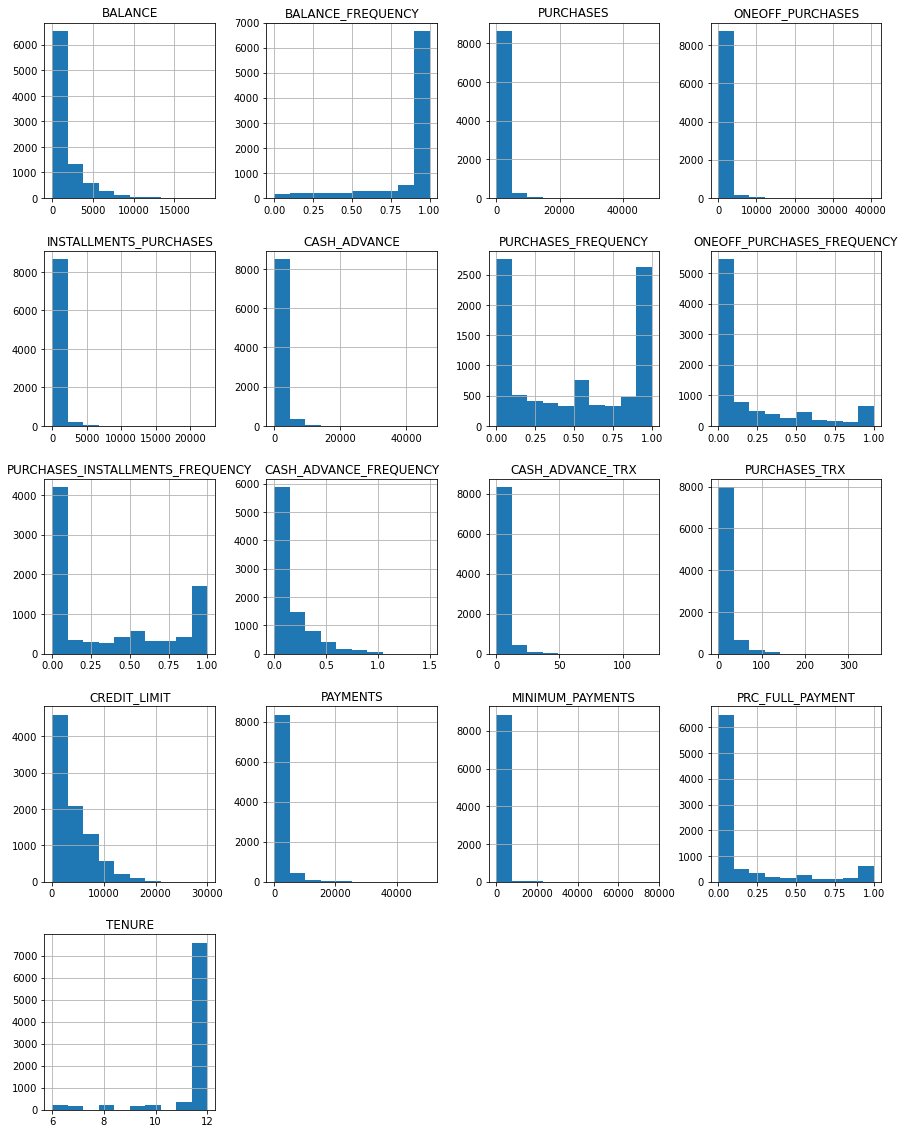

In [6]:
df.hist(figsize = (15,20));

In [7]:
df.drop("CUST_ID", axis = 1, inplace = True)

In [8]:
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

copiadata = escala.fit_transform(df)
datacopia = pd.DataFrame(copiadata, columns= df.columns)
datacopia.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960268,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688712,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826127,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826127,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905302,-0.364368,-2.657913e-01,-0.525551,0.36068


In [10]:
enlaces = linkage(datacopia, method = "ward")
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184170e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59722203e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04443567e+02, 8.95000000e+03]])

In [ ]:
dendrogram(enlaces);

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusteres = fcluster(enlaces, 4, criterion="maxclust")
df['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
df.head()

In [ ]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

In [ ]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

In [ ]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

In [ ]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

In [ ]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

In [ ]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

# Conclusion

CLUSTER 1 - PEOPLE WITH LOW LEVEL OF INCOME. Not Frequent purchases.
CLUSTER 2 - PEOPLE WITH MEDIAN LEVEL OF INCOME. High Frequent purchases.
CLUSTER 3 - PEOPLE WITH HIGH LEVEL OF INCOME. Not Frequent purchases and the most high advance level.
CLUSTER 4 - PEOPLE WITH LOW LEVEL OF INCOME. Frequent purchases.